# Part 1_ Customer Segmentation by Region and & Spending

## Step 1: Import merged dataset

In [5]:
## Step 1: Import the merged dataset

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

In [6]:
# set the visualization style

sns.set_style('whitegrid')

In [7]:
# Define path

path = r'/Users/kevinmcgreen/Documents/InstacartProject/04 Analysis/Prepared Data/orpd_prods_cust_together.pkl'

In [8]:
merged_df = pd.read_pickle(os.path.join(path,'/Users/kevinmcgreen/Documents/InstacartProject/04 Analysis/Prepared Data/orpd_prods_cust_together.pkl'))

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30657347 entries, 0 to 30657346
Data columns (total 26 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int64         
 1   customer_id             object        
 2   order_number            int64         
 3   order_day_of_week       int64         
 4   order_hour_of_day       int64         
 5   days_since_prior_order  float64       
 6   product_id              int64         
 7   add_to_cart_order       int64         
 8   reordered               int64         
 9   product_name            object        
 10  aisle_id                int64         
 11  department_id           int64         
 12  prices                  float64       
 13  user_order_avg          float64       
 14  loyalty_flag            float64       
 15  spending_flag           object        
 16  order_frequency_flag    object        
 17  first_name              object        
 18  

## Step 2: Handle PII(Personally Identifiable Information)

In [10]:
# Remove pii columns

pii_columns = ['first_name', 'surname', 'date_joined']

merged_df.drop(columns=pii_columns, inplace= True)

In [11]:
# Verify pii has been removed

merged_df.columns

Index(['order_id', 'customer_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'user_order_avg', 'loyalty_flag',
       'spending_flag', 'order_frequency_flag', 'gender', 'state', 'age',
       'num_dependents', 'family_status', 'income'],
      dtype='object')

## Step 3: Regional segmentation 

In [12]:
# Define region mapping

west = ['Arizona', 'Colorado','Idaho', 'Montana','Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California',
       'Hawaii', 'Oregon', 'Washington']

midwest = ['Idiana', 'Illinois', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri',
          'Nebraska', 'North Dakota', 'South Dakota']

south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'Texas',
        'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas',
        'Louisiana', 'Oklahoma']

northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey',
            'New York', 'Pennsylvania']

In [13]:
# Assign region

def assign_region(state):
    if state in west: 
        return 'West'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in northeast:
        return 'Northeast'

merged_df['region'] = merged_df['state'].apply(assign_region)

In [14]:
# Check for distribution

merged_df['region'].value_counts()

region
South        10208094
West          7838932
Midwest       6586649
Northeast     5427268
Name: count, dtype: int64

In [15]:
merged_df

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,loyalty_flag,spending_flag,order_frequency_flag,gender,state,age,num_dependents,family_status,income,region
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,...,5.813559,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South
1,2539329,1,1,2,8,-1.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,5.813559,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South
2,2539329,1,1,2,8,-1.0,12427,3,0,Original Beef Jerky,...,5.813559,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South
3,2539329,1,1,2,8,-1.0,26088,4,0,Aged White Cheddar Popcorn,...,5.813559,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South
4,2539329,1,1,2,8,-1.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,5.813559,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30657342,2977660,206209,13,1,12,7.0,14197,5,1,Tomato Paste,...,6.937984,Low spender,Regular Customer,Female,Iowa,74,3,married,137969,Midwest
30657343,2977660,206209,13,1,12,7.0,38730,6,0,Brownie Crunch High Protein Bar,...,6.937984,Low spender,Regular Customer,Female,Iowa,74,3,married,137969,Midwest
30657344,2977660,206209,13,1,12,7.0,31477,7,0,High Protein Bar Chunky Peanut Butter,...,6.937984,Low spender,Regular Customer,Female,Iowa,74,3,married,137969,Midwest
30657345,2977660,206209,13,1,12,7.0,6567,8,0,Chocolate Peanut Butter Protein Bar,...,6.937984,Low spender,Regular Customer,Female,Iowa,74,3,married,137969,Midwest


## Step 4: Regional spending habits analysis

#### Aggregation by Customer sum(orders)

In [16]:
# Aggregate spend per customer

customer_spending = merged_df.groupby('customer_id').agg({
    'prices': 'sum',
    'state': 'first'}).reset_index()

In [17]:
# Define spending flag

threshold = 1000
customer_spending['Spending Level'] = customer_spending['prices'].apply(
    lambda x: 'High Spender' if x > threshold else 'Low spender')

In [18]:
# Group by state and spending level

state_spending = customer_spending.groupby(['state', 'Spending Level']).size().reset_index(name='count')

In [19]:
# Calculate percentage per state

state_totals = state_spending.groupby('state')['count'].transform('sum')
state_spending['percentage'] = (state_spending['count'] / state_totals)* 100

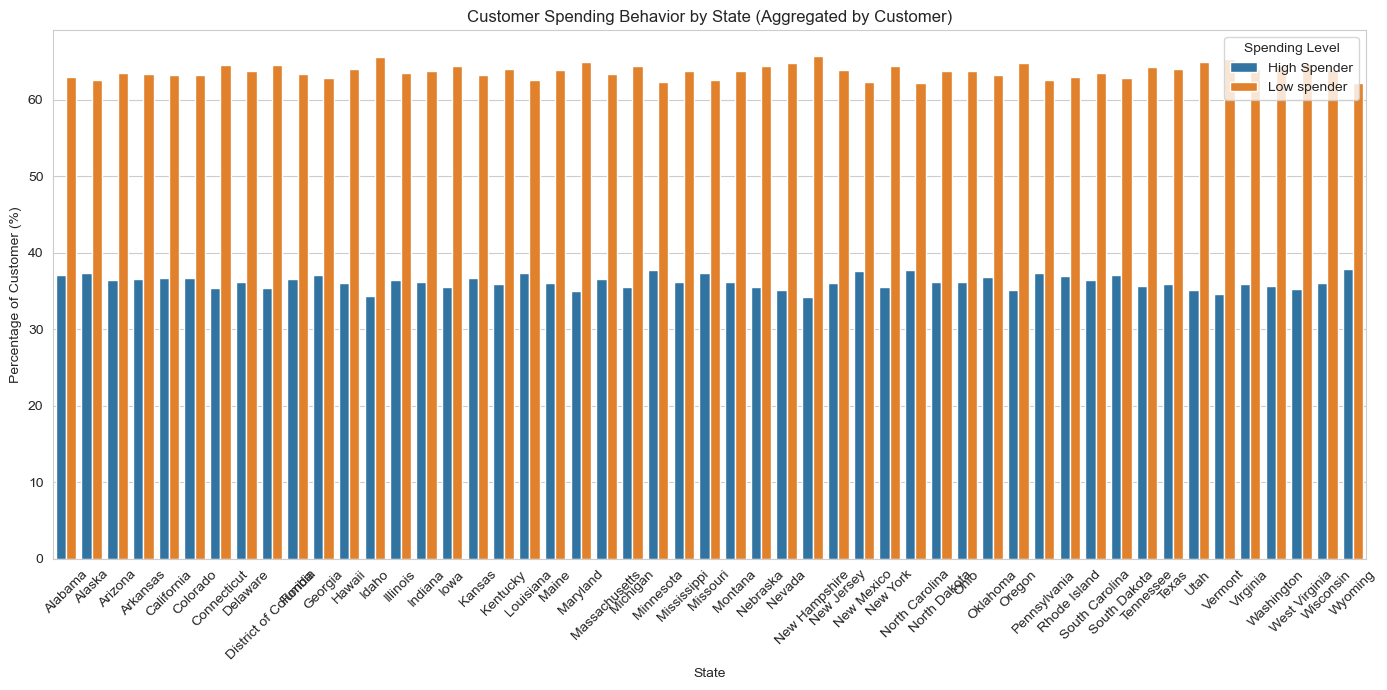

In [20]:
# The plot

plt.figure(figsize=(14, 7))
sns.barplot(data = state_spending,
            x = 'state', y= 'percentage', hue= 'Spending Level')
plt.title('Customer Spending Behavior by State (Aggregated by Customer)')
plt.ylabel('Percentage of Customer (%)')
plt.xlabel('State')
plt.xticks(rotation= 45)
plt.legend(title= 'Spending Level')
plt.tight_layout()
plt.show()


## Step 5: Exclude low-activity customers(less than 5 orders)

In [21]:
# Get customer order counts

order_counts = merged_df.groupby('customer_id')['order_number'].max()

In [22]:
# Create a flag

low_activity_customers = order_counts[order_counts < 5].index
merged_df['activity_flag'] = merged_df['customer_id'].isin(low_activity_customers)

In [23]:
# Exclude them
df_filtered = merged_df[~merged_df['activity_flag']]

In [24]:
# Export filtered data

df_filtered.to_pickle('filtered_data.pkl')

In [25]:
df_filtered

,order_id,customer_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,order_frequency_flag,gender,state,age,num_dependents,family_status,income,region,activity_flag
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,...,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South,False
1,2539329,1,1,2,8,-1.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South,False
2,2539329,1,1,2,8,-1.0,12427,3,0,Original Beef Jerky,...,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South,False
3,2539329,1,1,2,8,-1.0,26088,4,0,Aged White Cheddar Popcorn,...,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South,False
4,2539329,1,1,2,8,-1.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Low spender,Regular Customer,Female,Alabama,31,3,married,40423,South,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30657342,2977660,206209,13,1,12,7.0,14197,5,1,Tomato Paste,...,Low spender,Regular Customer,Female,Iowa,74,3,married,137969,Midwest,False
30657343,2977660,206209,13,1,12,7.0,38730,6,0,Brownie Crunch High Protein Bar,...,Low spender,Regular Customer,Female,Iowa,74,3,married,137969,Midwest,False
30657344,2977660,206209,13,1,12,7.0,31477,7,0,High Protein Bar Chunky Peanut Butter,...,Low spender,Regular Customer,Female,Iowa,74,3,married,137969,Midwest,False
30657345,2977660,206209,13,1,12,7.0,6567,8,0,Chocolate Peanut Butter Protein Bar,...,Low spender,Regular Customer,Female,Iowa,74,3,married,137969,Midwest,False


## Step 6: Customer profiling

In [26]:
# Creating sample profile based on Age, Income, Dependents, Order hour/day and department. e.g babby = parent; alchol= adult

def profile(row) :
    if row['age'] < 25 and row['income'] < 40000 and row['num_dependents'] ==0:
        return 'Student'
    elif 25 <= row['age'] < 40 and row['department_id'] == 18:
        return 'Young Parent'
    elif row['income'] > 100000  and row['num_dependents'] > 2:
        return 'Affluent Family'
    elif row['order_hour_of_day'] >= 20 : 
        return 'Night Shopper'
    elif row['order_hour_of_day'] < 6: 
        return 'Early Bird'
    else:
        return 'General Shopper'

merged_df['profile'] = merged_df.apply(profile, axis= 1)

## Step 7: Visualize profile distribution

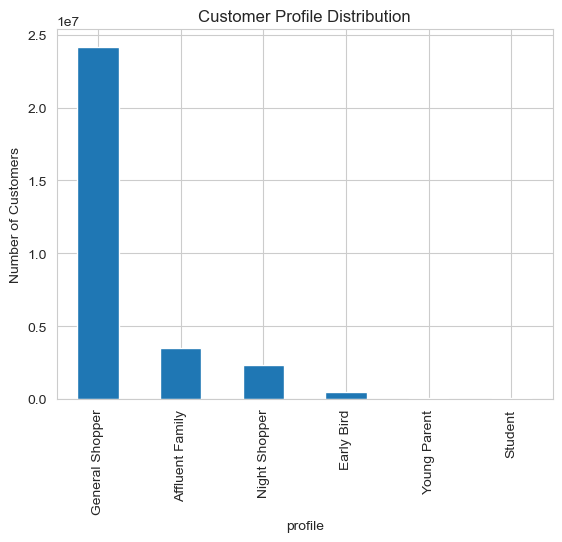

In [27]:
merged_df['profile'].value_counts().plot(kind='bar', title='Customer Profile Distribution')
plt.ylabel("Number of Customers")
plt.show()

In [28]:
# Create the visualization 

plt.figure(figsize=(12, 6))

bars = plt.barh(profile_data['Profile'],
                profile_data['Count'],
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

NameError: name 'profile_data' is not defined

<Figure size 1200x600 with 0 Axes>

## Step 8: Aggregate Metrics by profile

In [ ]:
# Group by customer profile and aggregate metrics

profile_stats = merged_df.groupby('profile').agg({
                    'order_number' : ['mean', 'max', 'min'],
                    'spending_flag
                                  


In [ ]:
def profile(row):
    if row['age'] < 25 and row['income'] < 50000 and row['num_dependents'] == 0:
        return 'Young single'
    elif row['age'] < 35 and row['num_dependents'] >= 1:
        return 'Young parent'
    elif row['age'] >= 60:
        return 'Senior'
    elif row['income'] >= 100000 and row['num_dependents'] >= 2:
        return 'Affluent family'
    elif row['income'] < 40000:
        return 'Budget-conscious'
    else:
        return 'Other'

merged_df['profile'] = merged_df.apply(profile, axis=1)

In [ ]:
profile_dist = merged_df['profile'].value_counts(normalize=True) * 100
profile_dist.plot(kind='bar', figsize=(8, 5))
plt.title('Distribution of Customer Profiles')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Group by customer profile and agg metrics

agg_profile = merged_df.groupby('profile').agg({'order_number': ['mean', 'max', 'min'],
                                                'prices': ['mean', 'max', 'min']}

agg_profile.columns = ['_'.join(col).strp() for col in agg_profile.columns.values] 
agg_profile.reset_index(inplace= True)

## Step 9: Linking Profiles with Regions and Departments

In [ ]:
# Creating crosstab

cross_region = pd.crosstab(merged_df['profile'], merged_df['region'], normalize= 'index') * 100
cross_department = pd.crosstab(merged_df['profile'], merged_df['department_id'], normalize= 'index') * 100

In [1]:
# Visualize results

plt.figure(figsize=(10, 6))
sns.heatmap(cross_region, annot= True, cmap= 'Blues', fmt= ".1f")
plt.title("Profile Distribution Across Regions")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(cross_department, annotation = False, cmap = 'Green')
plt.title("Profile vs Department Distribution")
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Export final dataset
merged_df.to_pickle('final_instacart_data.pkl')
merged_df.to_csv('final_instacart_data.csv', index= False)